In [2]:
import numpy as np
import pandas as pd
import os

# Replace the file path with your desired file path
file_path = r"C:\Users\Asus\Downloads\Churn_Modelling.csv"

# Iterate over the file path
for dirname, _, filenames in os.walk(file_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print(df.shape)

(10000, 14)


In [6]:
#1- means customer has left the bank ,
#0- means the customer has not left the bank 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#the below code will tell us if the datasets has some duplicated code or not 

In [9]:
df.duplicated().sum()

0

In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [16]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [17]:
#Random state meaning":
#random_state=1 is used as an argument in the train_test_split function from the sklearn.model_selection module.
#When random_state is set to a specific value, such as 1 in this case, it ensures that the data is split in a reproducible
#manner. This means that if you run the code multiple times with the same value of random_state, you will get the same random 
#split each time. This is useful for debugging, testing, and ensuring consistent results across different runs.

In [18]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [19]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
X_train.shape

(8000, 11)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled


array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

In [25]:

model= Sequential()

model.add(Dense(11,activation='sigmoid', input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


model.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [41]:
history= model.fit(X_train_scaled,y_train,batch_size=50, epochs=100, verbose=1 , validation_split= 0.2)

Epoch 1/100
128/128 [==============================] - 2s 6ms/step - loss: 0.3319 - accuracy: 0.8630 - val_loss: 0.3503 - val_accuracy: 0.8606
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8652 - val_loss: 0.3497 - val_accuracy: 0.8637
Epoch 3/100
128/128 [==============================] - 0s 4ms/step - loss: 0.3317 - accuracy: 0.8628 - val_loss: 0.3499 - val_accuracy: 0.8625
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3315 - accuracy: 0.8655 - val_loss: 0.3498 - val_accuracy: 0.8631
Epoch 5/100
128/128 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.8630 - val_loss: 0.3505 - val_accuracy: 0.8612
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8631 - val_loss: 0.3505 - val_accuracy: 0.8606
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8641 - val_loss: 0.3505 - val_accuracy: 0.8600

In [29]:
#to check where our weights and biases are stored
model.layers[0].get_weights()

[array([[ 0.15746   ,  0.12197949,  0.14583445,  0.23825999,  0.08452152,
         -0.30702835,  0.24772537, -0.26199955,  0.01858239, -0.03881614,
          0.40263775],
        [ 0.55994624, -1.6241596 , -2.1195548 , -0.72761154, -0.7881354 ,
          0.09692887, -1.8507472 ,  0.07685737, -1.7121211 , -0.01613222,
         -0.04226809],
        [ 0.08898003, -0.20098779,  0.22219811,  0.00439651, -0.11340913,
         -0.34750482,  0.0765587 , -0.25971487, -0.0244064 ,  0.06988011,
          0.08296027],
        [-0.6182698 , -0.8426018 , -0.01901567,  0.8024661 , -0.541007  ,
         -0.34849045,  0.6371744 ,  0.33000055,  0.11518825,  0.71463925,
          0.26840687],
        [ 0.44399905, -0.5080101 , -0.3094545 ,  1.531548  , -3.1869252 ,
         -0.6673785 , -0.3025208 , -0.70820045, -0.4175099 ,  0.6777107 ,
         -0.87017745],
        [ 0.28301787, -0.09488649,  0.07534596,  0.00958348,  0.0131848 ,
         -0.32099184, -0.03172541,  0.31379533, -0.17431448, -0.1436938

In [30]:
model.layers[1].get_weights()

[array([[ 0.62405694, -0.02983017, -0.63961667,  0.02043943, -0.1430503 ,
          0.348364  , -0.46745795, -0.43394113, -0.32370326, -0.05300952,
          0.38411096],
        [ 0.47783023, -0.36456707, -0.27752465,  0.0202443 ,  0.35843596,
          0.44164398, -0.18034278, -0.46301827, -0.2711876 ,  0.03064374,
          0.67246854],
        [ 1.0439658 , -1.0922612 , -0.18706279,  1.3363026 ,  1.1713408 ,
          0.6946311 , -0.4615993 , -0.81575835, -0.5274005 , -0.6218765 ,
          1.1652272 ],
        [-1.3393553 ,  1.4879037 ,  1.3458757 , -1.3698889 , -1.8887274 ,
         -0.7669016 ,  1.3367335 ,  1.5395995 ,  1.3555393 ,  1.4219986 ,
         -1.6005962 ],
        [-2.0618453 ,  1.4509158 ,  2.0932684 , -2.0741343 , -1.1143769 ,
         -1.4522413 ,  2.0351672 ,  1.6430937 ,  2.0504014 ,  1.9202954 ,
         -1.9234627 ],
        [ 0.06137033, -0.9325553 , -0.34058484,  0.8155931 ,  1.2641646 ,
          0.25802717, -0.46383998, -0.3194872 , -1.019165  , -0.2744615

In [31]:
model.layers[2].get_weights()

[array([[-1.5579349 ],
        [ 1.0814717 ],
        [ 1.2438604 ],
        [-1.264044  ],
        [-1.6493595 ],
        [-0.70862913],
        [ 1.4902385 ],
        [ 1.4663874 ],
        [ 1.0447707 ],
        [ 1.4715102 ],
        [-1.209096  ]], dtype=float32),
 array([-0.3080533], dtype=float32)]

In [48]:
model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


array([[0.25351915],
       [0.3280492 ],
       [0.13745093],
       ...,
       [0.12016591],
       [0.13709225],
       [0.26404217]], dtype=float32)

In [49]:
#for the above output, the values are not 0 or 1 it is so because we have used sigmoid function and it returns probability, 
#to change the value in o or 1, we need to set a reference that is threshold (let, 0.5) if its greater than 0.5 than
#customer bank chor dega


In [50]:
y_log= model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [51]:
y_pred = np.where(y_log>0.5,1,0)

In [52]:
#The code y_pred.argmax(axis=-1) is used to obtain the index of the maximum value along the last axis of the array y_pred. 
#axis=-1 indicates the last axis of the array, which is the column axis. So, for each row (sample) in y_pred, argmax(axis=-1)
#returns the index of the column with the highest probability, indicating the predicted class for that sample.

In [53]:
y_pred = y_pred.argmax(axis=-1)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

NameError: name 'plt' is not defined

In [56]:
history.history


{'loss': [0.33192017674446106,
  0.33195534348487854,
  0.3317071497440338,
  0.3314698040485382,
  0.33137282729148865,
  0.3310641944408417,
  0.3310493528842926,
  0.33088549971580505,
  0.3309883773326874,
  0.3305901288986206,
  0.33055323362350464,
  0.3308623135089874,
  0.3307581841945648,
  0.33036085963249207,
  0.3302440643310547,
  0.32998722791671753,
  0.32960402965545654,
  0.32999682426452637,
  0.3296414613723755,
  0.32899484038352966,
  0.32931283116340637,
  0.3293111324310303,
  0.32939770817756653,
  0.3289991319179535,
  0.3293033540248871,
  0.3289933502674103,
  0.32897377014160156,
  0.3284541070461273,
  0.32855698466300964,
  0.3285178244113922,
  0.328779935836792,
  0.32834187150001526,
  0.32812243700027466,
  0.3281686007976532,
  0.3279764652252197,
  0.3277854025363922,
  0.32805535197257996,
  0.32737722992897034,
  0.3280261754989624,
  0.3277203440666199,
  0.3273070454597473,
  0.327554851770401,
  0.32734978199005127,
  0.327212929725647,
  0.3272

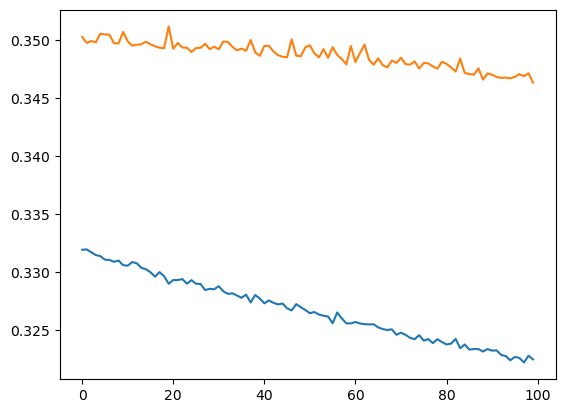

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

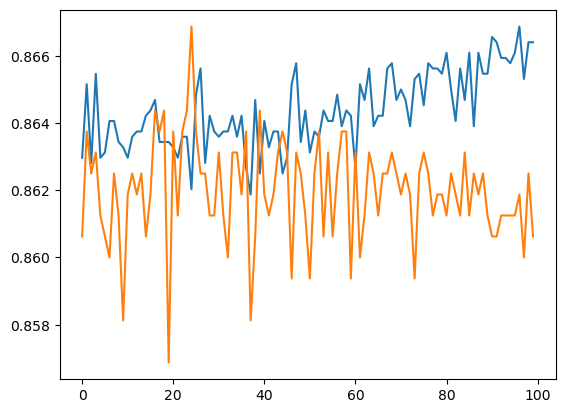

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [58]:
plt.savefig('loss_plot.png') 

<Figure size 640x480 with 0 Axes>

In [59]:
#reaccess it!